Mean Age: 29.699
Standard Deviation of Age: 14.516
Percent of passengers that survived: 38.384%
Percent of passengers that perished: 61.616%
Percent of individuals in each class (1st, 2nd, 3rd): 
	1st class: 24.2%
	2nd class: 20.7%
	3rd class: 55.1%


Males vs. females: 

18.89% of males survived.
81.11% of males perished.
74.2% of females survived.
25.8% of females perished.


Adults vs. children: 

38.0 % of adults survived.
62.0 % of adults perished.
54.0 % of children survived.
46.0 % of children perished.


By class: 

63.0 % of the upper class survived.
37.0 % of the upper class perished.
47.0 % of the middle class survived.
21.0 % of the middle class perished.
24.0 % of the lower class survived.
76.0 % of the lower class perished.


Traveling with family vs. traveling with no family: 

51.0% of people traveling with family survived.
49.0% of people traveling with family perished.
30.0% of people traveling without family survived.
70.0% of people traveling without family perished

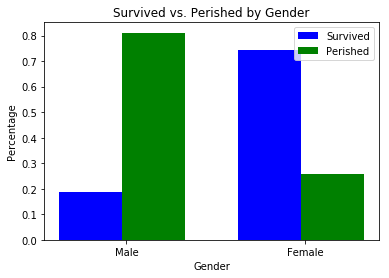

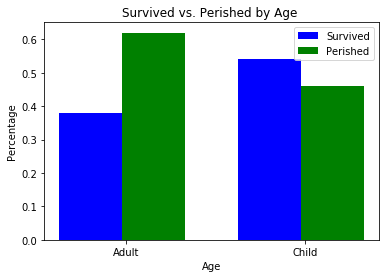

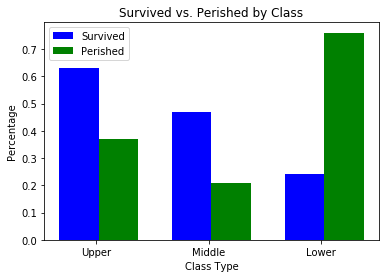

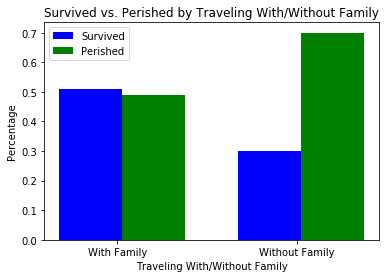

In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/Users/Deanna/Documents/Classes Spring 2019/ITP449_Files')

# read the CSV file using pandas, index_col parameter names each indices with PassengerId

titanicData = pd.read_csv("TitanicTrain.csv", index_col=0)
pd.set_option('display.max_columns', None)

# store the titanic data in DataFrame with named indices

df_titanicData = pd.DataFrame(titanicData)
np_titanicData = np.array(titanicData)


# compute and display metrics (mean and standard deviation of age, percentage of passengers that survived
# percent of passengers that perished, percent of passengers for each class

meanAge = round(np.nanmean(np_titanicData[:,4], dtype='float64'),3)
stdAge = round(np.nanstd(np_titanicData[:,4], dtype='float64'),3)


# calculate percent survived and perished

survivedCount = 0
perishedCount = 0

for i in np_titanicData[:,0]:
    if i == 1:
        survivedCount = survivedCount + 1
    else:
        perishedCount = perishedCount + 1

totalCount = perishedCount + survivedCount
percentPerished = round(perishedCount/totalCount*100,3)
percentSurvived = round(survivedCount/totalCount*100,3)

# calculate percentage of each class

firstClassCount = 0
secondClassCount = 0
thirdClassCount = 0

for i in np_titanicData[:,1]:
    if i == 1:
        firstClassCount = firstClassCount + 1
    elif i == 2:
        secondClassCount = secondClassCount + 1
    else:
        thirdClassCount = thirdClassCount + 1

totalClassCount = firstClassCount + secondClassCount + thirdClassCount

percentFirstClass = round(firstClassCount/totalClassCount,3)
percentSecondClass = round(secondClassCount/totalClassCount,3)
percentThirdClass = round(thirdClassCount/totalClassCount,3)

# display metrics

print("Mean Age: " + str(meanAge))
print("Standard Deviation of Age: " + str(stdAge))
print("Percent of passengers that survived: " + str(percentSurvived) + "%")
print("Percent of passengers that perished: " + str(percentPerished) + "%")
print("Percent of individuals in each class (1st, 2nd, 3rd): ")
print("\t1st class: " + str(percentFirstClass*100) + "%")
print("\t2nd class: " + str(percentSecondClass*100) + "%")
print("\t3rd class: " + str(percentThirdClass*100) + "%")


# create a new column with classification: child, adult, or unknown

df_titanicData['Age Classification'] = np.where(df_titanicData['Age'] >= 18, 'Adult',
                                                (np.where(df_titanicData['Age']  < 18, 'Child', 'Unknown' )))



# compute and display following metrics for passengers who survived and perished:
# percent male and female, percent adult & child, percent for each class, percent traveling with family

maleSurvivedCount = 0
femaleSurvivedCount = 0
malePerishedCount = 0
femalePerishedCount = 0

# male survived, male perished, female survived, female perished count

for survived, male in zip(np_titanicData[:,0], np_titanicData[:,3]):
    if np.logical_and(survived == 1, male == 'male'):
        maleSurvivedCount = maleSurvivedCount + 1

for survived, female in zip(np_titanicData[:,0], np_titanicData[:,3]):
    if np.logical_and(survived == 1, female == 'female'):
        femaleSurvivedCount = femaleSurvivedCount + 1

for perished, male in zip(np_titanicData[:,0], np_titanicData[:,3]):
    if np.logical_and(perished == 0, male == 'male'):
        malePerishedCount = malePerishedCount + 1
#
for perished, female in zip(np_titanicData[:,0], np_titanicData[:,3]):
    if np.logical_and(perished == 0, female == 'female'):
        femalePerishedCount = femalePerishedCount + 1

# display percentage of male survived, male perished, female survived, female perished count


percentageMaleSurvived = round(maleSurvivedCount/(maleSurvivedCount + malePerishedCount),4)
percentageFemaleSurvived = round(femaleSurvivedCount/(femalePerishedCount + femaleSurvivedCount),4)
percentageMalePerished = round(malePerishedCount/(maleSurvivedCount + malePerishedCount),4)
percentageFemalePerished = round(femalePerishedCount/(femaleSurvivedCount + femalePerishedCount),4)

print('\n')

print("Males vs. females: \n")
print(str(percentageMaleSurvived*100) + "% of males survived.")
print(str(percentageMalePerished*100) + "% of males perished.")
print(str(percentageFemaleSurvived*100) + "% of females survived.")
print(str(percentageFemalePerished*100) + "% of females perished.")


# percent adult and child who survived and perished

survivedAdultCount = 0
survivedChildCount = 0
perishedAdultCount = 0
perishedChildCount = 0


for sur, ad in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,11]):
    if sur == 1 and ad == 'Adult':
        survivedAdultCount = survivedAdultCount + 1


for sur, child in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,11]):
    if sur == 1 and child == 'Child':
        survivedChildCount = survivedChildCount + 1

for perished, adult in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,11]):
    if perished == 0 and adult == 'Adult':
        perishedAdultCount = perishedAdultCount + 1

for perished, child in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,11]):
    if perished == 0 and child == 'Child':
        perishedChildCount = perishedChildCount + 1

percentageAdultSurvived = round(survivedAdultCount/(survivedAdultCount + perishedAdultCount),2)
percentageChildSurvived = round(survivedChildCount/(survivedChildCount + perishedChildCount),2)
percentageAdultPerished = round(perishedAdultCount/(survivedAdultCount + perishedAdultCount),2)
percentageChildPerished = round(perishedChildCount/(survivedChildCount + perishedChildCount),2)


# display percent adult and child, perished and survived

print('\n')
print("Adults vs. children: \n")

print(str(percentageAdultSurvived*100) + " % of adults survived.")
print(str(percentageAdultPerished*100) + " % of adults perished.")
print(str(percentageChildSurvived*100) + " % of children survived.")
print(str(percentageChildPerished*100) + " % of children perished.")

# calculate percentage of each class that survived & perished

survived1stClass = 0
survived2ndClass = 0
survived3rdClass = 0
perished1stClass = 0
perished2ndClass = 0
perished3rdClass = 0

for survived, first in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,1]):
    if survived == 1 and first == 1:
        survived1stClass = survived1stClass + 1

for survived, second in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,1]):
    if survived == 1 and second == 2:
        survived2ndClass = survived2ndClass + 1

for survived, third in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,1]):
    if survived == 1 and third == 3:
        survived3rdClass = survived3rdClass + 1

for perished, first in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,1]):
    if perished == 0 and first == 1:
        perished1stClass = perished1stClass + 1

for perished, second in zip(df_titanicData.iloc[:, 0], df_titanicData.iloc[:, 1]):
    if perished == 0 and second == 2:
        perished2ndClass = perished2ndClass + 1

for perished, third in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,1]):
    if perished == 0 and third == 3:
        perished3rdClass = perished3rdClass + 1


percentage1stClassSurvived = round(survived1stClass/(survived1stClass + perished1stClass),2)
percentage2ndClassSurvived = round(survived2ndClass/(survived2ndClass + perished2ndClass),2)
percentage3rdClassSurvived = round(survived3rdClass/(survived3rdClass + perished3rdClass),2)
percentage1stClassPerished = round(perished1stClass/(survived1stClass + perished1stClass),2)
percentage2ndClassPerished = round(perished2ndClass/(survived2ndClass + perished3rdClass),2)
percentage3rdClassPerished = round(perished3rdClass/(survived3rdClass + perished3rdClass),2)

lst = [percentage1stClassSurvived, percentage2ndClassSurvived, percentage3rdClassSurvived]
# display percentage of class that survived and perished

print('\n')
print("By class: \n")

print(str(percentage1stClassSurvived*100) + " % of the upper class survived.")
print(str(percentage1stClassPerished*100) + " % of the upper class perished.")
print(str(percentage2ndClassSurvived*100) + " % of the middle class survived.")
print(str(percentage2ndClassPerished*100) + " % of the middle class perished.")
print(str(percentage3rdClassSurvived*100) + " % of the lower class survived.")
print(str(percentage3rdClassPerished*100) + " % of the lower class perished.")

# calculate percentage of people traveling with family that perished and survived


df_titanicData['Traveling With Family'] = np.where(df_titanicData['SibSp'] + df_titanicData['Parch'] > 0, 'Yes', 'No')



survivedWithFamily = 0
perishedWithFamily = 0
survivedWithoutFamily = 0
perishedWithoutFamily = 0

for survived, family in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,12]):
    if survived == 1 and family == "Yes":
        survivedWithFamily = survivedWithFamily + 1

for survived, nofamily in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,12]):
    if survived == 1 and nofamily == "No":
        survivedWithoutFamily = survivedWithoutFamily + 1

for perished, family in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,12]):
    if perished == 0 and family == "Yes":
        perishedWithFamily = perishedWithFamily + 1

for perished, nofamily in zip(df_titanicData.iloc[:,0], df_titanicData.iloc[:,12]):
    if perished == 0 and nofamily == "No":
        perishedWithoutFamily = perishedWithoutFamily + 1

percentageSurvivedWithFamily = round(survivedWithFamily/(survivedWithFamily + perishedWithFamily),2)
percentageSurvivedWithoutFamily = round(survivedWithoutFamily/(survivedWithoutFamily + perishedWithoutFamily),2)
percentagePerishedWithFamily = round(perishedWithFamily/(survivedWithFamily + perishedWithFamily),2)
percentagePerishedWithoutFamily = round(perishedWithoutFamily/(survivedWithoutFamily + perishedWithoutFamily),2)

# display percentages of survived vs. perished with family and without family

print('\n')
print("Traveling with family vs. traveling with no family: \n")

print(str(percentageSurvivedWithFamily*100) + "% of people traveling with family survived.")
print(str(percentagePerishedWithFamily*100) + "% of people traveling with family perished.")
print(str(percentageSurvivedWithoutFamily*100) + "% of people traveling without family survived.")
print(str(percentagePerishedWithoutFamily*100) + "% of people traveling without family perished.")



# data visualization by gender

bar_width = 0.35
fig, ax = plt.subplots()
genderAx1 = plt.bar(1, percentageMaleSurvived, bar_width, color='b', label = "Survived")
genderAx2 = plt.bar(1 + bar_width, percentageMalePerished, bar_width, color='g', label = "Perished")
genderAx3 = plt.bar(2, percentageFemaleSurvived, bar_width, color='b')
genderAx4 = plt.bar(2 + bar_width, percentageFemalePerished, bar_width, color='g')
ax.set_title("Survived vs. Perished by Gender")
ax.set_xlabel("Gender")
ax.set_xticks(np.arange(1.2,3,step=1))
ax.set_xticklabels(["Male", "Female"])
ax.set_ylabel("Percentage")
ax.legend()
plt.show()

# data visualization of adult vs. child

fig, ax = plt.subplots()
adultChildAx1 = plt.bar(1, percentageAdultSurvived, bar_width, color = 'b', label = "Survived")
adultChildAx2 = plt.bar(1 + bar_width, percentageAdultPerished, bar_width, color = 'g', label = 'Perished')
adultChildAx3 = plt.bar(2, percentageChildSurvived, bar_width, color = 'b')
adultChildAx4 = plt.bar(2 + bar_width, percentageChildPerished, bar_width, color = 'g')
ax.set_title("Survived vs. Perished by Age ")
ax.set_xlabel("Age")
ax.set_xticks(np.arange(1.2,3,step=1))
ax.set_xticklabels(["Adult", "Child"])
ax.set_ylabel("Percentage")
ax.legend()
plt.show()


# data visualization by class



fig, ax = plt.subplots()
ax1 = plt.bar(1, percentage1stClassSurvived, bar_width, color = 'b', label = "Survived")
ax2 = plt.bar(1 + bar_width, percentage1stClassPerished, bar_width, color = 'g', label = "Perished")
ax3 = plt.bar(2, percentage2ndClassSurvived, bar_width, color = 'b')
ax4 = plt.bar(2 + bar_width, percentage2ndClassPerished, bar_width, color = 'g')
ax5 = plt.bar(3, percentage3rdClassSurvived, bar_width, color = 'b')
ax6 = plt.bar(3 + bar_width, percentage3rdClassPerished, bar_width, color = 'g')

ax.set_xlabel('Class Type')
ax.set_xticks(np.arange(1.15,3.5,step=1))
ax.set_xticklabels(['Upper', 'Middle', 'Lower'])
ax.set_ylabel('Percentage')
ax.set_title("Survived vs. Perished by Class")
ax.legend()

plt.show()

# data visualization of traveling with family vs. traveling with no family

fig, ax = plt.subplots()

familyAx1 = plt.bar(1, percentageSurvivedWithFamily, bar_width, color = 'b', label = "Survived")
familyAx2 = plt.bar(1 + bar_width, percentagePerishedWithFamily, bar_width, color = 'g', label = "Perished")
familyAx3 = plt.bar(2, percentageSurvivedWithoutFamily, bar_width, color = 'b')
familyAx4 = plt.bar(2 + bar_width, percentagePerishedWithoutFamily, bar_width, color = 'g')

ax.set_title('Survived vs. Perished by Traveling With/Without Family')
ax.set_xlabel('Traveling With/Without Family')
ax.set_xticks(np.arange(1.15,3,step=1))
ax.set_xticklabels(['With Family', 'Without Family'])
ax.set_ylabel('Percentage')
ax.legend()
plt.show()

